In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
maladie = pd.read_csv('Dataset_Maladie_Cadiovasculaire.txt', delimiter=';')
maladie.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
maladie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


# Régression logistique

L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives).

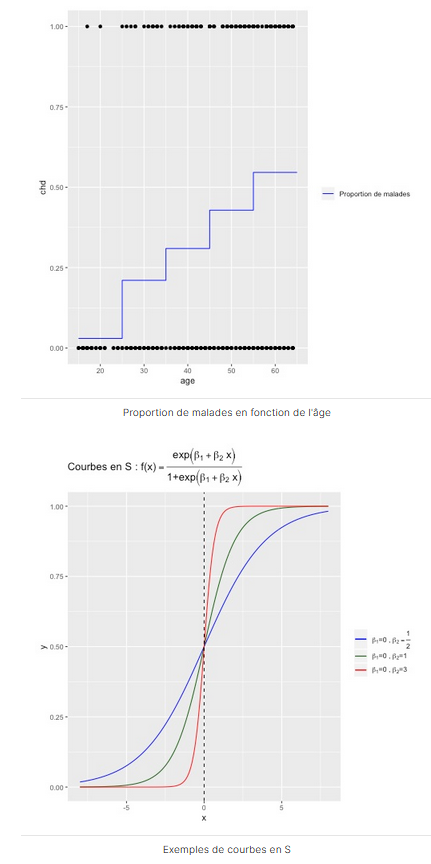
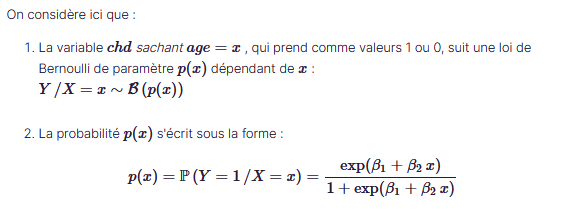

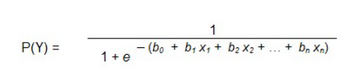

En fonction des valeurs des variabes explicatives, on applique on probabilité à la variable cible d'être égale à 0 ou 1.

In [42]:
maladie['cl_age'] = pd.cut(maladie['age'], bins = np.arange(15, 75, 10), right=False)
prop = pd.crosstab(maladie['cl_age'], maladie['chd'], normalize='index')
prop_chd = pd.DataFrame(data = {'age': np.concatenate((np.array([15]), 
                                                       np.repeat(np.arange(25,65,10), repeats=2), 
                                                       np.array([65])), axis=0),
                                'prop_chd': np.repeat(prop.loc[:,1].values, repeats=2)})

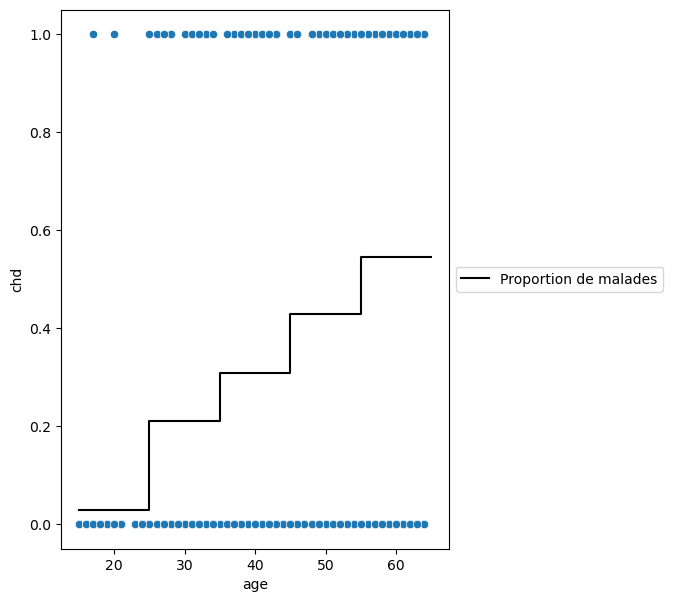

In [43]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [46]:
reg_log1 = smf.glm('chd ~ age', data=maladie, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      460
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -262.78
Date:                Fri, 08 Sep 2023   Deviance:                       525.56
Time:                        14:19:00   Pearson chi2:                     445.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1416
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5217      0.416     -8.465      0.0

In [47]:
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]

In [51]:
print(beta1)
print(beta2)

-3.521710338508835
0.06410803282436106


In [48]:
x = np.linspace(start=15, stop=65, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'age': x, 'prop_chd': y})

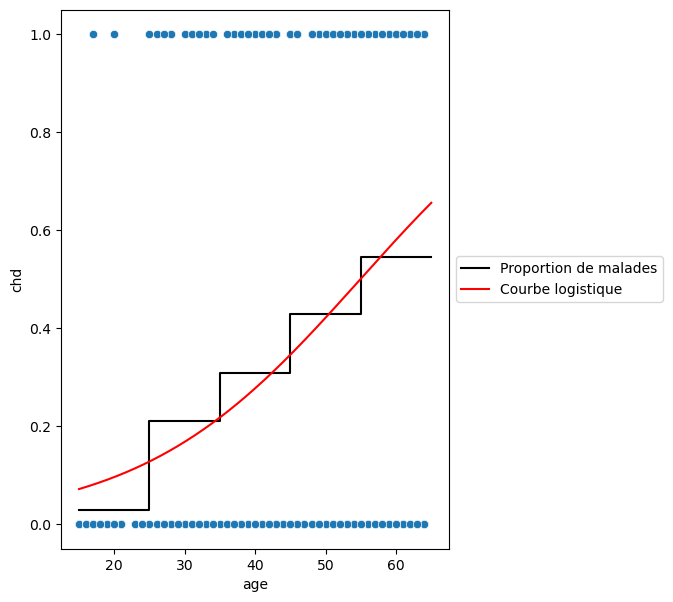

In [49]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
plt.plot(reg_log['age'], reg_log['prop_chd'], color='red', label='Courbe logistique')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
reg_log2 = smf.glm('chd~sbp+tobacco+ldl+adiposity+famhist+typea+obesity+alcohol+age',
                   data=maladie, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.07
Date:                Fri, 08 Sep 2023   Deviance:                       472.14
Time:                        14:19:39   Pearson chi2:                     452.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2353
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.1507      1